## Surfing the Bitcoin Waves: Comprehensive Trend Forecasting with Various Trader Types
#### -Can Ali Ateş
#### -Emre Çoban

In [196]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dataset

## 1.1 Data Explanation

The dataset is a combination of 8 different CSV files.

1. **klines:** The dataset has “Open”, “Close”, “High” and “Low” price features for the Bitcoin stock market.
2. **botTracker:** The dataset has an “estimatedBotCount” feature which indicates the prediction of bot activity based on the searching for frequently occurring unique order sizes.
3. **binanceGlobalAccounts:** The dataset has “Long”, “Short”, and “Ratio of Short and Long” features that represent the total number of accounts that are long or short strategy on Binance.
4. **binanceTopTraderAccounts:** The dataset has “Long”, “Short”, and “Ratio of Short and Long” features that represent the total number of top trader accounts (top %20) that are long or short strategies on Binance.
5. **binanceTopTraderPositions:** The dataset has “Long”, “Short”, and “Ratio of Short and Long” features that represent the total number of top traders positions (top %20) that are long or short strategy on Binance.
6. **binanceWhaleRetailDelta:** The dataset has a “WhaleRetailPositionDelta” feature that indicates the difference between the percentage of long positions held by top trader accounts ("whales") and the percentage of long positions held by global accounts ("retail").
7. **buyVolume:** The dataset has a “BuyingOrderQuantity” feature that indicates the quantity of buying orders executed during a specified period.
8. **sellVolume:** The dataset has a “SellingOrderQuantity” feature that indicates the quantity of selling orders executed during a specified period.

In [197]:
# Define the CSV files
data_files = ["klines", "botTracker", "binanceGlobalAccounts", "binanceTopTraderAccounts", 
              "binanceTopTraderPositions", "binanceWhaleDelta", "buyVolume", "sellVolume"]

## 1.2 Data Visualization

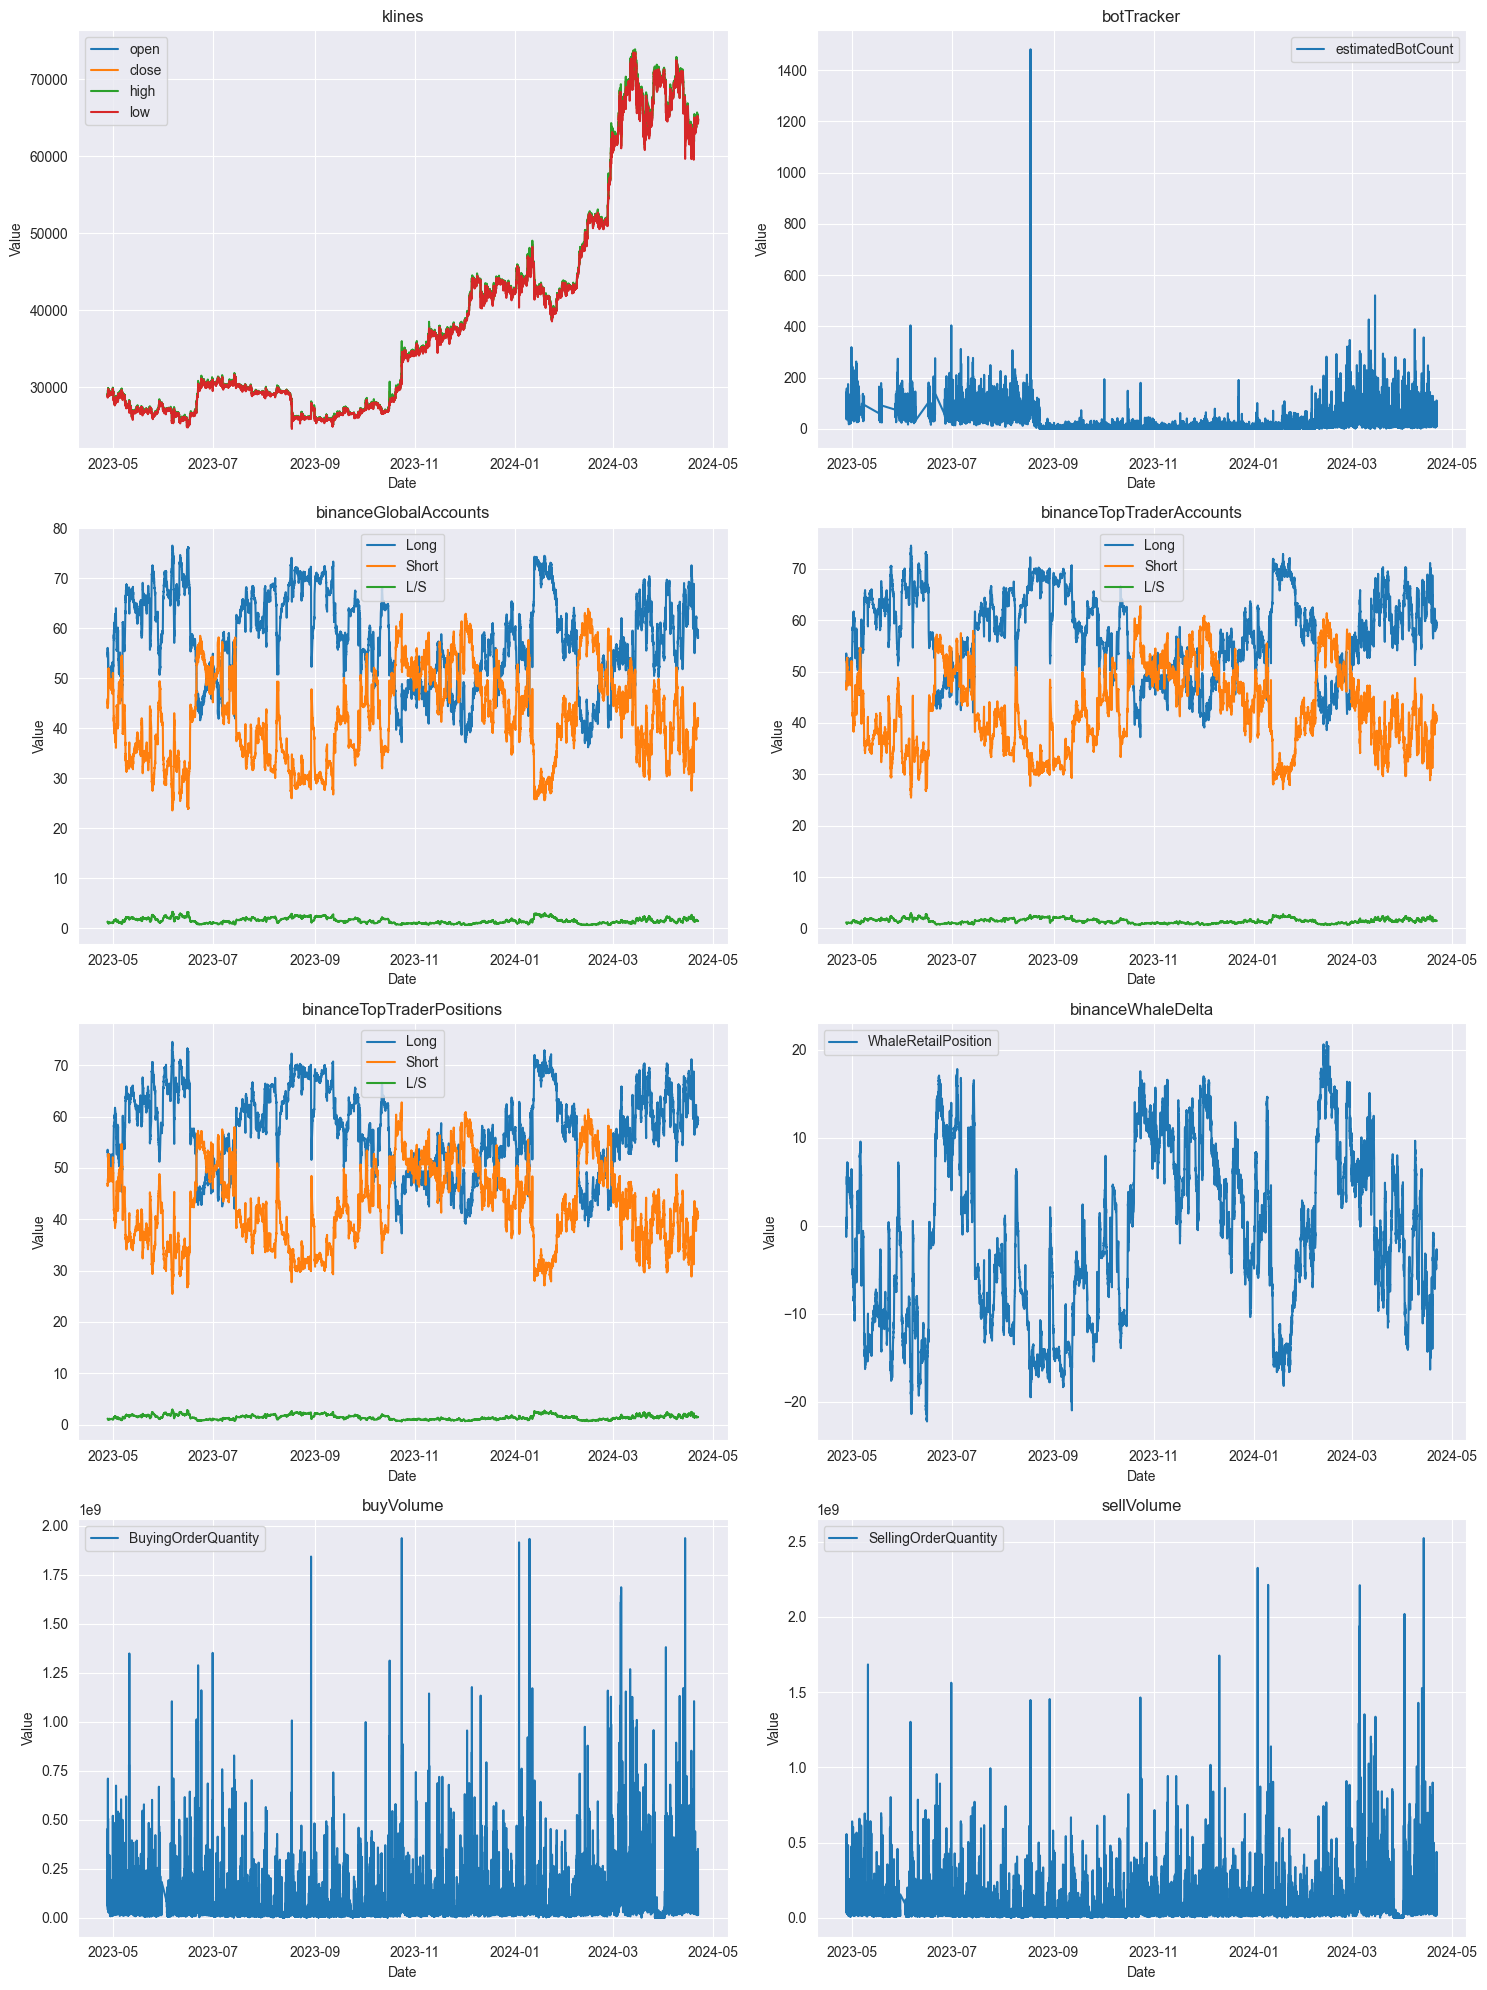

In [198]:
def plot_csv(filename:str, ax:plt.axes):
    # Read the CSV file
    data = pd.read_csv(f"data/{filename}15mins.csv")
    # Convert 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    # Plot the data
    for column in data.columns[1:]:
        ax.plot(data['Date'], data[column], label=column)
    ax.set_title(f'{filename}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

def plot_data(files:list):
    # Create a subplot grid to plot all data files
    fig, axs = plt.subplots(4, 2, figsize=(15, 20))
    # Iterate over each data file and plot them into subplot grid
    for i, csv_file in enumerate(files):
        plot_csv(filename=csv_file, ax=axs[i // 2, i % 2])
    # Display the plots
    plt.tight_layout()
    plt.show()

plot_data(data_files)

## 1.3 Data Frame Creation

In [199]:
# Create a data frame that holds all information in data files
bitcoin_df = pd.DataFrame(columns=['Date'])

# Merge files based on common column
for file in data_files:
    print(file)
    temp_df = pd.read_csv(f"data/{file}15mins.csv")
    temp_df['Date'] = pd.to_datetime(temp_df['Date'])
    bitcoin_df = pd.merge(bitcoin_df, temp_df, on='Date', how="outer")

# Display the data frame
bitcoin_df.set_index("Date", inplace=True)
display(bitcoin_df)

klines
botTracker
binanceGlobalAccounts
binanceTopTraderAccounts
binanceTopTraderPositions
binanceWhaleDelta
buyVolume
sellVolume


,open,close,high,low,estimatedBotCount,Long_x,Short_x,L/S_x,Long_y,Short_y,L/S_y,Long,Short,L/S,WhaleRetailPosition,BuyingOrderQuantity,SellingOrderQuantity
Date,,,,,,,,,,,,,,,,,
2024-04-21 18:30:00+00:00,64810.0,64770.4,64810.0,64717.2,12.0,58.16,41.84,1.3901,59.25,40.75,1.4540,59.25,40.75,1.4540,-2.78,1.500585e+07,2.328670e+07
2024-04-21 18:15:00+00:00,64819.8,64810.0,64819.8,64687.7,39.0,58.17,41.83,1.3906,59.21,40.79,1.4516,59.21,40.79,1.4516,-2.68,3.674641e+07,4.003513e+07
2024-04-21 18:00:00+00:00,64793.0,64819.8,64847.7,64600.0,47.0,58.35,41.65,1.4010,59.24,40.76,1.4534,59.24,40.76,1.4534,-2.98,4.500680e+07,7.044362e+07
2024-04-21 17:45:00+00:00,64721.3,64793.0,64859.0,64713.4,20.0,58.47,41.53,1.4079,59.31,40.69,1.4576,59.31,40.69,1.4576,-3.10,4.129480e+07,3.586159e+07
2024-04-21 17:30:00+00:00,64636.5,64721.3,64788.0,64615.3,29.0,58.30,41.70,1.3981,59.22,40.78,1.4522,59.22,40.78,1.4522,-2.81,6.551020e+07,5.254361e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-07 11:02:00+00:00,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-07 10:47:00+00:00,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-07 10:32:00+00:00,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Exploratory Data Analysis and Preprocessing

In [200]:
# Rename the columns for naming convention
bitcoin_df.rename(columns={"Long_x": "globalAccounts_Long",
                  "Short_x": "globalAccounts_Short",
                  "L/S_x": "globalAccounts_LS",
                  "Long_y": "topTraderAccounts_Long",
                  "Short_y": "topTraderAccounts_Short",
                  "L/S_y": "topTraderAccounts_LS",
                  "Long": "topTraderPositions_Long",
                  "Short": "topTraderPositions_Short",
                  "L/S": "topTraderPositions_LS"},
                  inplace=True)

display(bitcoin_df.head())

,open,close,high,low,estimatedBotCount,globalAccounts_Long,globalAccounts_Short,globalAccounts_LS,topTraderAccounts_Long,topTraderAccounts_Short,topTraderAccounts_LS,topTraderPositions_Long,topTraderPositions_Short,topTraderPositions_LS,WhaleRetailPosition,BuyingOrderQuantity,SellingOrderQuantity
Date,,,,,,,,,,,,,,,,,
2024-04-21 18:30:00+00:00,64810.0,64770.4,64810.0,64717.2,12.0,58.16,41.84,1.3901,59.25,40.75,1.4540,59.25,40.75,1.4540,-2.78,1.500585e+07,2.328670e+07
2024-04-21 18:15:00+00:00,64819.8,64810.0,64819.8,64687.7,39.0,58.17,41.83,1.3906,59.21,40.79,1.4516,59.21,40.79,1.4516,-2.68,3.674641e+07,4.003513e+07
2024-04-21 18:00:00+00:00,64793.0,64819.8,64847.7,64600.0,47.0,58.35,41.65,1.4010,59.24,40.76,1.4534,59.24,40.76,1.4534,-2.98,4.500680e+07,7.044362e+07
2024-04-21 17:45:00+00:00,64721.3,64793.0,64859.0,64713.4,20.0,58.47,41.53,1.4079,59.31,40.69,1.4576,59.31,40.69,1.4576,-3.10,4.129480e+07,3.586159e+07
2024-04-21 17:30:00+00:00,64636.5,64721.3,64788.0,64615.3,29.0,58.30,41.70,1.3981,59.22,40.78,1.4522,59.22,40.78,1.4522,-2.81,6.551020e+07,5.254361e+07


In [201]:
# Get data frame info
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34645 entries, 2024-04-21 18:30:00+00:00 to 2024-03-05 15:30:00+00:00
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open                      34556 non-null  float64
 1   close                     34556 non-null  float64
 2   high                      34556 non-null  float64
 3   low                       34556 non-null  float64
 4   estimatedBotCount         31376 non-null  float64
 5   globalAccounts_Long       34535 non-null  float64
 6   globalAccounts_Short      34535 non-null  float64
 7   globalAccounts_LS         34535 non-null  float64
 8   topTraderAccounts_Long    34532 non-null  float64
 9   topTraderAccounts_Short   34532 non-null  float64
 10  topTraderAccounts_LS      34532 non-null  float64
 11  topTraderPositions_Long   34532 non-null  float64
 12  topTraderPositions_Short  34532 non-null  float64
 13  topTraderPosit

## 2.1 Handling Missing Values 

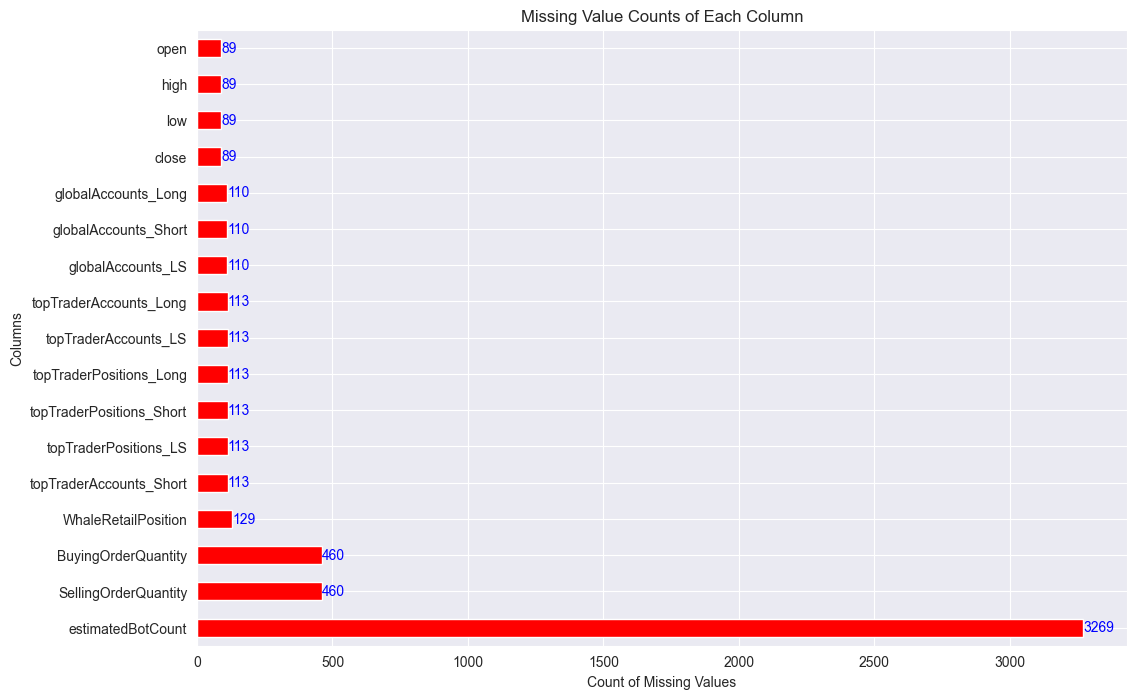

In [202]:
def visualize_missing_value_counts(df=bitcoin_df):
    # Plot bar chart to display missing value counts of features
    plt.figure(figsize=(12, 8))
    missing_values = df.isnull().sum().sort_values(ascending=False)
    missing_values.plot(kind='barh', color='red')
    
    # Adding instance count on the graph
    for i, v in enumerate(missing_values):
        plt.text(v + 1, i, str(v), color='blue', va='center')
    
    # Plot NaN value graph
    plt.xlabel('Count of Missing Values')
    plt.ylabel('Columns')
    plt.title('Missing Value Counts of Each Column')
    plt.show()

visualize_missing_value_counts()

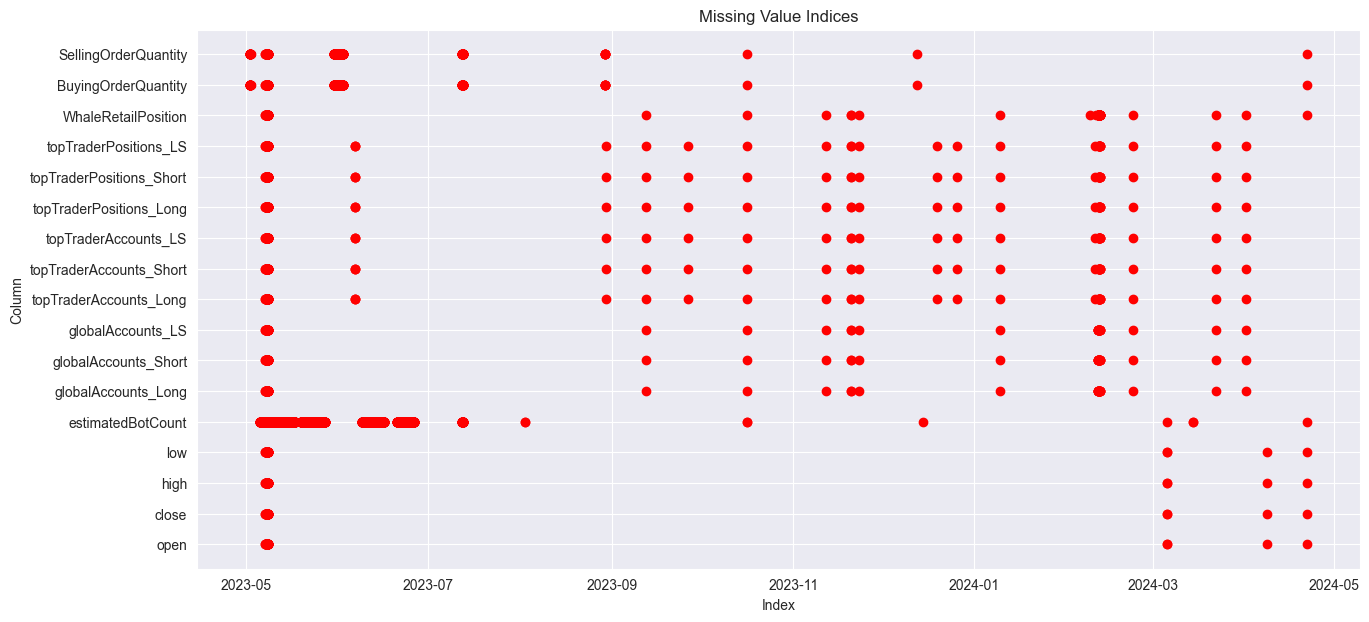

In [203]:
def visualize_missing_value_indexes(df=bitcoin_df):
    # Create a DataFrame to store missing value indices
    missing_indices = df.isnull().astype(int)
    
    # Plot missing value indices
    plt.figure(figsize=(15, 7))
    y_missing, y_non_missing = [], []
    for i, column in enumerate(df.columns):
        missing_values = missing_indices[column][missing_indices[column] == 1].index
        non_missing_values = missing_indices[column][missing_indices[column] == 0].index
        y_missing.extend([i] * len(missing_values))
        y_non_missing.extend([i + 0.5] * len(non_missing_values))
        plt.scatter(missing_values, [i] * len(missing_values), marker='o', color='red', label='Missing Values' if i == 0 else None)
    
    plt.yticks(range(len(df.columns)), df.columns)
    plt.title('Missing Value Indices')
    plt.xlabel('Index')
    plt.ylabel('Column')
    plt.show()

visualize_missing_value_indexes()

**The API returns NaN when the system does not detect any bot at this interval, therefore we will fill the NaN values with 0 in the estimatedBotCount**

In [204]:
# Impute the NaN values of estimatedBotCount with 0
bitcoin_df.fillna({'estimatedBotCount': 0}, inplace=True)

# Check the NaN values in the estimatedBotCount feature after imputation
print(f"The estimatedBotCount feature has {bitcoin_df['estimatedBotCount'].isnull().sum()} NaN values")

The estimatedBotCount feature has 0 NaN values


**Most of the features have same consecutive NaN values at the end, therefore drop these rows**

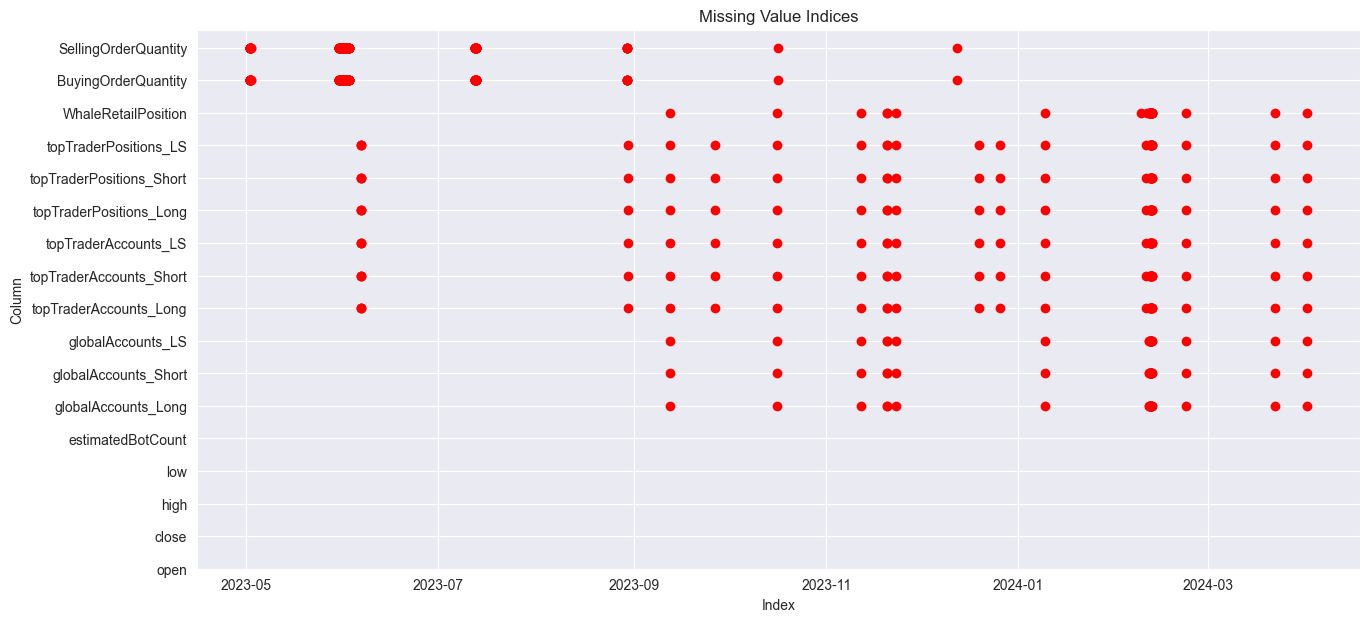

In [205]:
# Choose the NaN values at the end using "open" feature as guidance
bitcoin_df.dropna(subset=["open"], inplace=True)
visualize_missing_value_indexes()

In [210]:
bitcoin_df.interpolate(method="linear", axis=1, inplace=True)

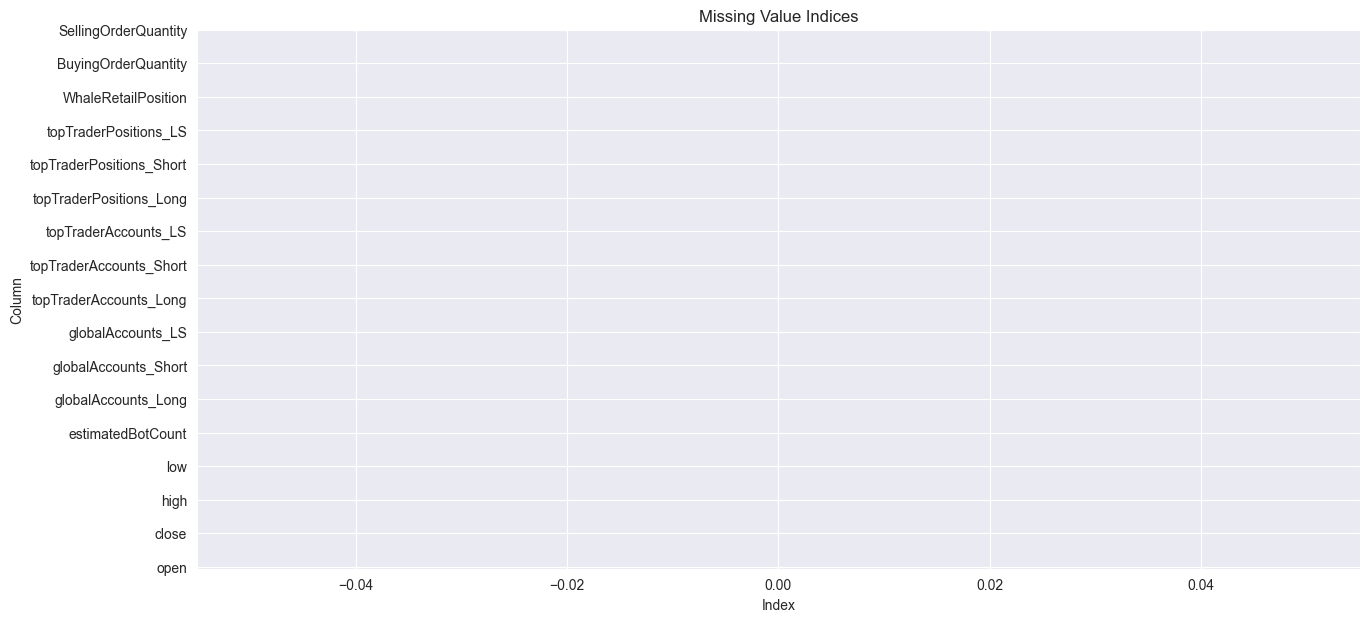

In [211]:
visualize_missing_value_indexes()

### Statistics of data

In [150]:

def print_dataframe_info(filename:str, interval:str):
    """
    Print information about the DataFrame for a given filename and interval.

    Parameters:
    - filename (str): The name of the file.
    - interval (str): The interval (e.g., 'Hourly', '15mins').
    """
    data = pd.read_csv(f"data/{filename}{interval}.csv")

    # Print basic information
    print(f"Basic information for {filename} ({interval}):")
    print(data.info())
    print("\n")

    # Print basic statistics
    print(f"Basic statistics for {filename} ({interval}):")
    print(data.describe())
    print("\n")
    print("-" * 60)


for file in files:
    for interval in intervals:
        print_dataframe_info(file, interval)

Basic information for botTracker (Hourly):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8381 entries, 0 to 8380
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               8381 non-null   object
 1   estimatedBotCount  8381 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 131.1+ KB
None


Basic statistics for botTracker (Hourly):
       estimatedBotCount
count        8381.000000
mean          149.152130
std           164.789079
min             0.000000
25%            20.000000
50%            75.000000
75%           253.000000
max          2264.000000


------------------------------------------------------------
Basic information for botTracker (15mins):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31376 entries, 0 to 31375
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               31376

#### Visualizing Boxplots To Detect Outliers

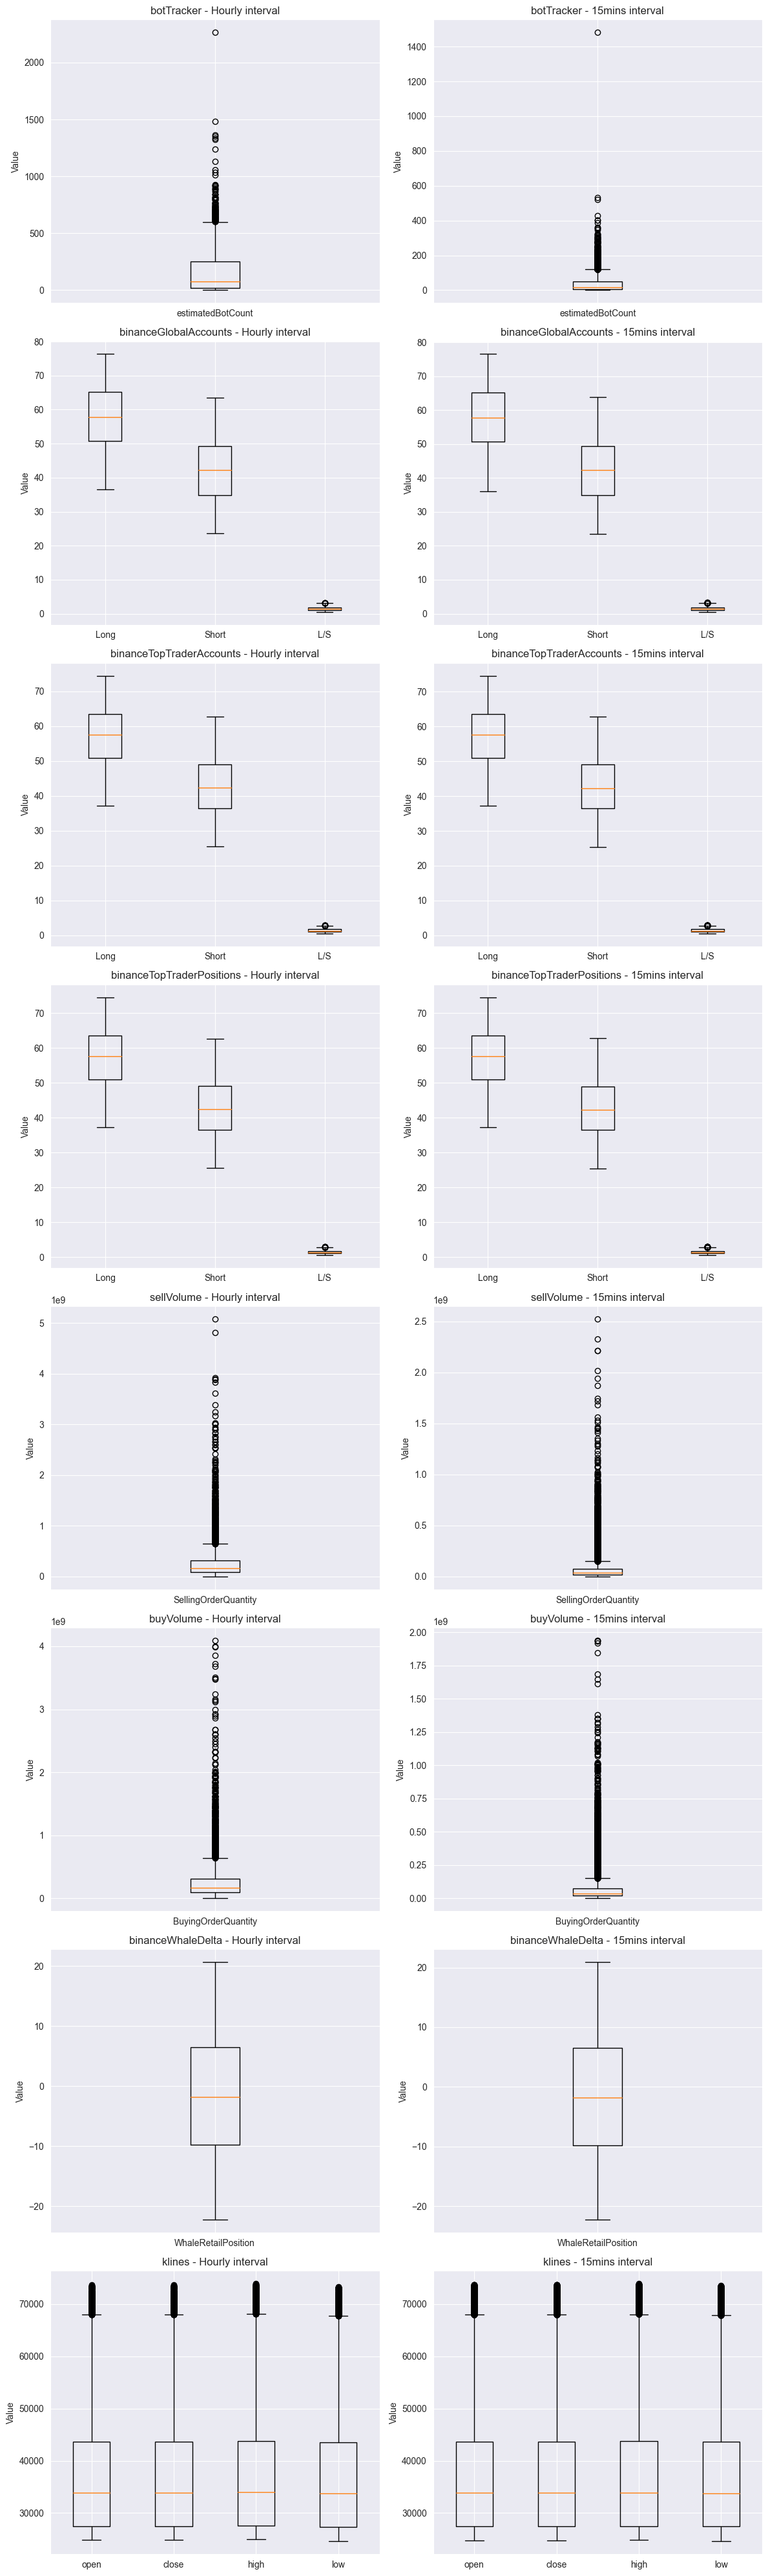

In [151]:
def plot_boxplots(files: list, intervals: list):
    """
    Plot boxplots for each feature in the specified time series datasets.

    Parameters:
    - files (list): List of file names.
    - intervals (list): List of intervals (e.g., ["15mins", "Hourly"]).
    """
    # Create subplots with the determined number of rows and two columns
    fig, axs = plt.subplots(len(files), len(intervals), figsize=(12, 5 * len(files)))

    for j, interval in enumerate(intervals):
        for i, file in enumerate(files):
            # Read the CSV file
            data = pd.read_csv(f"data/{file}{interval}.csv")

            # Exclude the "Date" column
            if "Date" in data.columns:
                data = data.drop(columns=["Date"])

            # Plot boxplot for the current file and interval
            axs[i, j].boxplot(data.values, labels=data.columns)
            axs[i, j].set_title(f"{file} - {interval} interval")
            axs[i, j].set_ylabel("Value")

    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.tight_layout()
    plt.show()

plot_boxplots(files, intervals)

### Data Preprocessing(cont.)